<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2025-I/blob/main/%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles como clasificadores

## Caso 1

In [1]:
# Cargamos librerías
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
# Creamos los datos
datos = pd.DataFrame({'Tiempo disponible': [5,3,1,4,2],
                      'Dificultad': [0,1,2,0,2],
                      'Estudia': [0,1,1,0,1]})
# Separamos los datos de las etiquetas
X = datos.drop('Tiempo disponible',axis = 1)
y = datos['Estudia']

In [4]:
# Instanciamos el modelo
modelo = DecisionTreeClassifier()
# Entrenamos el modelo
modelo.fit(X,y)

DecisionTreeClassifier()

In [6]:
print(classification_report(y, modelo.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [7]:
# Visualizamos la estructura del árbol
print(export_text(modelo, feature_names = list(X.columns.values)))

|--- Dificultad <= 0.50
|   |--- class: 0
|--- Dificultad >  0.50
|   |--- class: 1



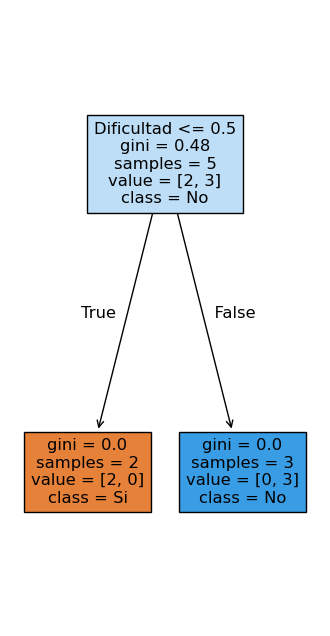

In [13]:
plt.figure(figsize = (4,8))
tree.plot_tree(modelo, feature_names = X.columns,
          class_names = ['Si','No'], filled = True);

## Caso 2

In [ ]:
# Cargamos los datos
datos = pd.read_csv('/content/data.csv')
datos.head()

In [15]:
# Revisamos la cantidad de registros de la BD
datos.shape

(569, 33)

In [16]:
# Fijamos el id como index del dataframe
datos.set_index('id', inplace = True)

In [17]:
# Revisamos de manera general las variables de base de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [18]:
# Revisamos el balanceo de clases
datos.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


In [19]:
# Separamos las variables predictoras de la variable
# objetivo
X = datos.drop(['diagnosis', 'Unnamed: 32'], axis = 1)
y = datos['diagnosis']

In [20]:
# Dividimos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 73)



In [21]:
# Instanciamos el modelo
modelo = DecisionTreeClassifier()

# Entrenamos el modelo
modelo.fit(X_train, y_train)

# Visualizamos el resporte de clasificación
print(classification_report(y_train, modelo.predict(X_train)))
print(classification_report(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

              precision    recall  f1-score   support

           B       0.90      0.90      0.90        72
           M       0.83      0.83      0.83        42

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



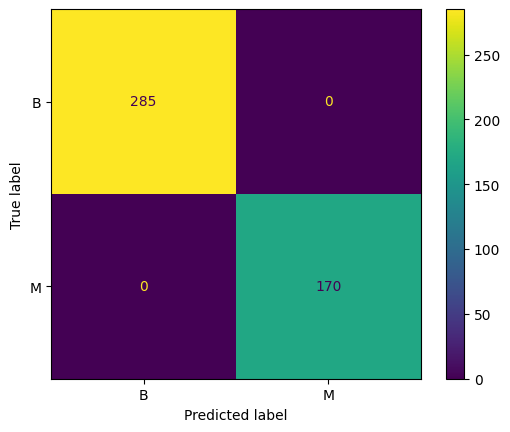

In [23]:
# Visualizamos la matriz de confusión del entrenamiento
ConfusionMatrixDisplay.from_estimator(modelo, X_train, y_train);

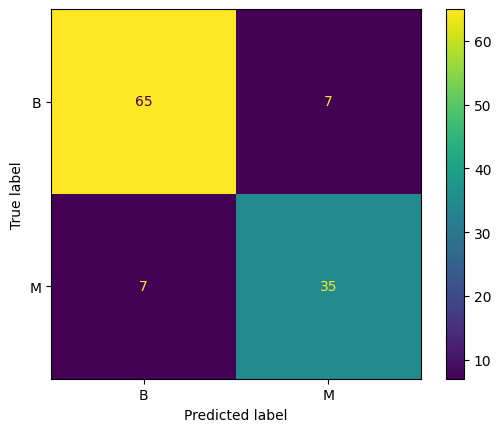

In [25]:
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test);

In [26]:
print(export_text(modelo, feature_names = list(X.columns.values)))

|--- perimeter_worst <= 115.35
|   |--- concave points_worst <= 0.15
|   |   |--- concave points_worst <= 0.11
|   |   |   |--- area_se <= 48.98
|   |   |   |   |--- texture_worst <= 33.10
|   |   |   |   |   |--- class: B
|   |   |   |   |--- texture_worst >  33.10
|   |   |   |   |   |--- texture_worst <= 33.56
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- texture_worst >  33.56
|   |   |   |   |   |   |--- class: B
|   |   |   |--- area_se >  48.98
|   |   |   |   |--- symmetry_se <= 0.02
|   |   |   |   |   |--- class: M
|   |   |   |   |--- symmetry_se >  0.02
|   |   |   |   |   |--- class: B
|   |   |--- concave points_worst >  0.11
|   |   |   |--- fractal_dimension_mean <= 0.06
|   |   |   |   |--- class: M
|   |   |   |--- fractal_dimension_mean >  0.06
|   |   |   |   |--- fractal_dimension_se <= 0.00
|   |   |   |   |   |--- class: M
|   |   |   |   |--- fractal_dimension_se >  0.00
|   |   |   |   |   |--- smoothness_worst <= 0.14
|   |   |   |   |   |   |

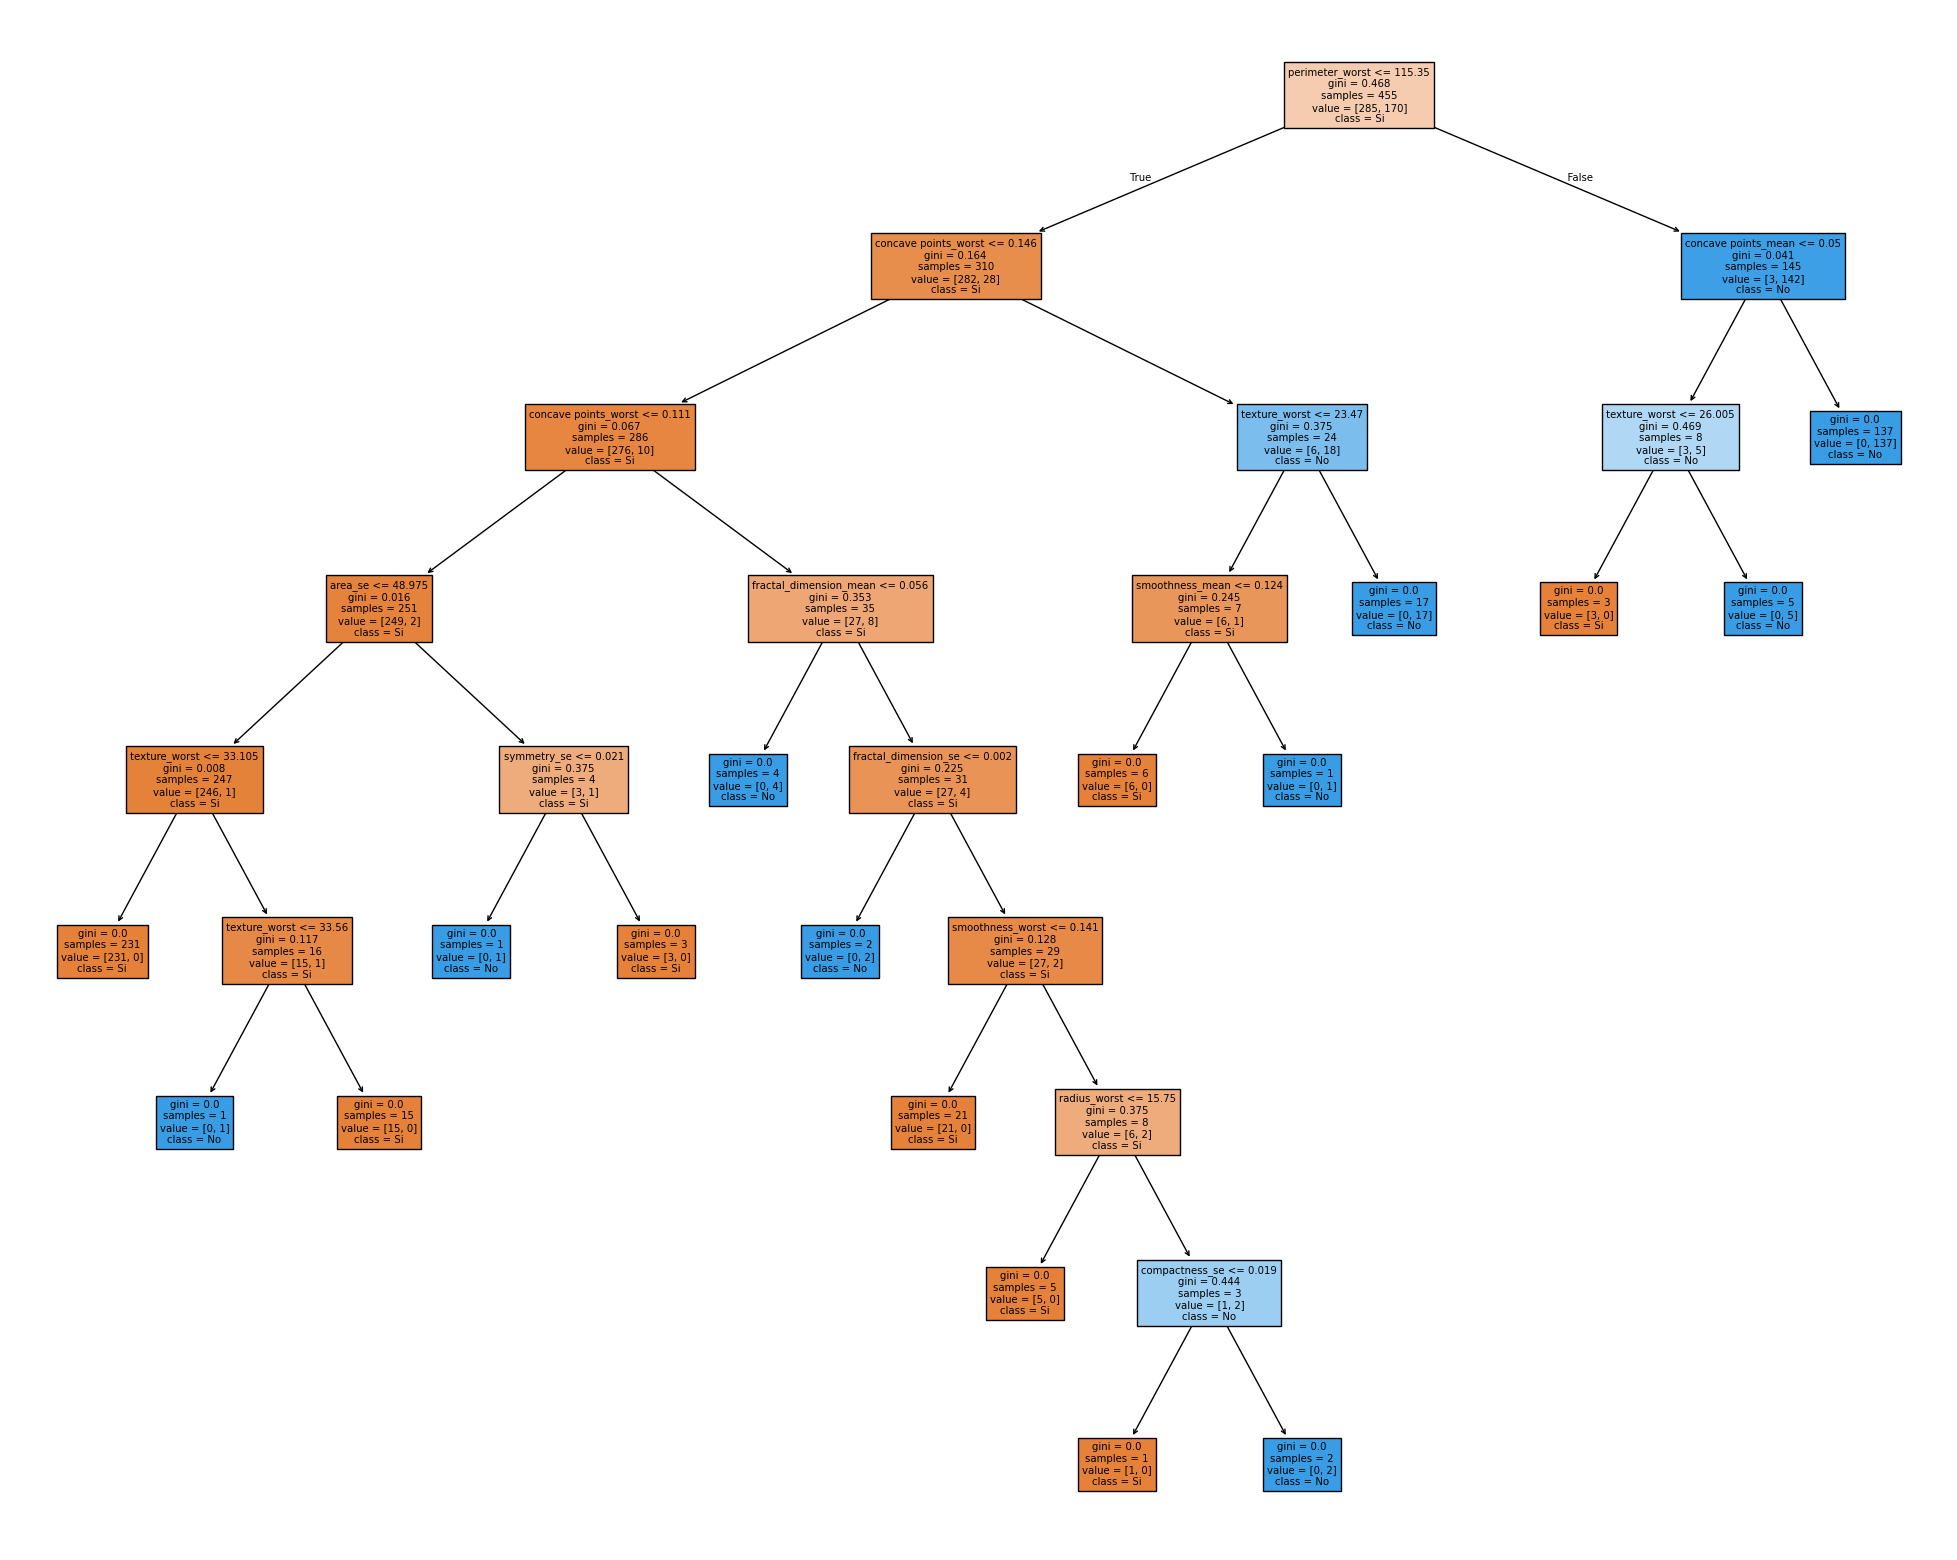

In [28]:
plt.figure(figsize = (25,20))
tree.plot_tree(modelo, feature_names = X.columns,
          class_names = ['Si','No'], filled = True);